### Elham Bahrami
### 12/14/2019
### Final Project

I am going to see which how incident classes are changed over the years, to make the analyz more understandable I used downlaoded bewlow data sets for years from 2012 to 2018 and then concatenate them.<br> After that I am going to see how incident classes are over the years and also how they are in terms of status!

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [390]:
df_2018 = pd.read_csv('https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate,class,boro,currentstatus,currentstatusdate%20where%20inspectiondate%20between%20%272018-01-01T12:00:00%27%20and%20%272018-12-31T23:59:00%27%20limit%20900000')

In [391]:
df_2017 = pd.read_csv('https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate,class,boro,currentstatus,currentstatusdate%20where%20inspectiondate%20between%20%272017-01-01T12:00:00%27%20and%20%272017-12-31T23:59:00%27%20limit%20900000')

In [392]:
df_2016 = pd.read_csv('https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate,class,boro,currentstatus,currentstatusdate%20where%20inspectiondate%20between%20%272016-01-01T12:00:00%27%20and%20%272016-12-31T23:59:00%27%20limit%20900000')

In [399]:
df_2015 = pd.read_csv('https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate,class,boro,currentstatus,currentstatusdate%20where%20inspectiondate%20between%20%272015-01-01T12:00:00%27%20and%20%272015-12-31T23:59:00%27%20limit%20900000')

In [393]:
df_2014 = pd.read_csv('https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate,class,boro,currentstatus,currentstatusdate%20where%20inspectiondate%20between%20%272014-01-01T12:00:00%27%20and%20%272014-12-31T23:59:00%27%20limit%20900000')

In [400]:
df_2013 = pd.read_csv('https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate,class,boro,currentstatus,currentstatusdate%20where%20inspectiondate%20between%20%272013-01-01T12:00:00%27%20and%20%272013-12-31T23:59:00%27%20limit%20900000')

In [402]:
df_2012 = pd.read_csv('https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate,class,boro,currentstatus,currentstatusdate%20where%20inspectiondate%20between%20%272012-01-01T12:00:00%27%20and%20%272012-12-31T23:59:00%27%20limit%20900000')

Now it is better to concatenate the data sets.

In [526]:
df = pd.concat([df_2012, df_2013, df_2014,df_2015, df_2016, df_2017, df_2018])

boro is not the right name for Borough, so in order to make it more undrestanable we change it to borough

In [445]:
df.rename(columns={'boro': 'borough'}, inplace=True)

In [447]:
df['inspectiondate'] = pd.to_datetime(df['inspectiondate'])

In [448]:
df['year'] = df.inspectiondate.dt.to_period('Y')

Let's see how many incident we have per class per year, Benjamin ploted number of incidents each year and they goes up each year, before we go to see how the classes changes over the years, let's have a glance how the numbers of incidents are each class over the years.

In [511]:
df.groupby(['year', 'class']).size()

year  class
2012  A         54913
      B        178451
      C         56724
      I          1173
2013  A         67412
      B        221219
      C         89438
      I          1627
2014  A         67622
      B        236104
      C         92285
      I          1223
2015  A         95127
      B        249947
      C         90872
      I        114210
2016  A         92759
      B        264723
      C         93054
      I         62998
2017  A        124632
      B        285201
      C         97402
      I         49648
2018  A        139015
      B        324454
      C        104749
      I         74632
dtype: int64

Also see it in one plot!

Text(0,0.5,'incident')

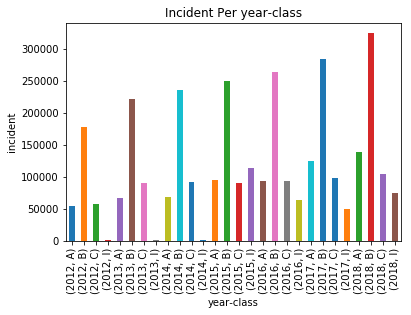

In [465]:
df.groupby(['year', 'class']).size().plot.bar()
plt.title('Incident Per year-class')
plt.xlabel('year-class')
plt.ylabel('incident')

In order to see the difference and the changes I need to put the result of previuos cell to a dataframe and go for it.

In [470]:
f = df.groupby(['year', 'class']).size()
f = f.reset_index().set_index('year')
f = pd.DataFrame(f)
f['difff'] = f.iloc[:,1
      ].pct_change(periods=4)

In [503]:
f

,class,0,difff
year,,,
2012,A,54913,NaN
2012,B,178451,NaN
2012,C,56724,NaN
2012,I,1173,NaN
2013,A,67412,0.227615
2013,B,221219,0.239662
2013,C,89438,0.576722
2013,I,1627,0.387042
2014,A,67622,0.003115


Now let's see which the max and min for each.

In [510]:
f.groupby('class').agg({'difff':['min','max']})

difff           
            min        max
class                     
A     -0.024893   0.406746
B      0.058631   0.239662
C     -0.015311   0.576722
I     -0.448402  92.385119

Even though the number of inident B is the highest one but its maximum of the changes is the lowest, for Incident I is the highest one since it does not have that number maybe it is not worth it to investigate more details but the changes of incident C is markable and need more attentions!

Maybe it is the time to see which borough has the highest number of closed cases and see the ratio of it for the incident classes.
Benjamin did for dissmised and not-closed and I realized that it's worth it to look the same for closed cased.

In [517]:
df.currentstatus.value_counts()

VIOLATION CLOSED                            1646537
VIOLATION DISMISSED                          917473
NOV SENT OUT                                 429576
INFO NOV SENT OUT                             91528
NOT COMPLIED WITH                             90011
FIRST NO ACCESS TO RE- INSPECT VIOLATION      80191
NOV CERTIFIED LATE                            26354
INVALID CERTIFICATION                         20997
SECOND NO ACCESS TO RE-INSPECT VIOLATION       7705
DEFECT LETTER ISSUED                           6915
VIOLATION WILL BE REINSPECTED                  4132
FALSE CERTIFICATION                            3291
CERTIFICATION POSTPONMENT DENIED               3041
CERTIFICATION POSTPONMENT GRANTED              2517
CIV14 MAILED                                    785
NOV CERTIFIED ON TIME                           355
VIOLATION REOPEN                                129
VIOLATION OPEN                                   76
COMPLIED IN ACCESS AREA                           1
Name: curren

In [450]:
closed = df[df['currentstatus']== 'VIOLATION CLOSED']

In [ ]:
closed = df[df['currentstatus']== 'VIOLATION CLOSED']

In [451]:
closed.groupby(['borough']).size()

borough
BRONX            560933
BROOKLYN         593020
MANHATTAN        358464
QUEENS           111106
STATEN ISLAND     23014
dtype: int64

In [513]:
closed['class'].value_counts()

B    896317
C    433977
A    310250
I      5993
Name: class, dtype: int64

So class B which is meidum sever off incident has the highest number of closed cases!

The Bronx has the highest number of closed cases!

Let's see how they are for dissmised case!

In [518]:
dismissed = df[df['currentstatus']== 'VIOLATION DISMISSED']

In [527]:
dismissed['borough'].value_counts()

BRONX            325958
BROOKLYN         285601
MANHATTAN        191809
QUEENS           105612
STATEN ISLAND      8493
Name: borough, dtype: int64

In [520]:
dissmised['class'].value_counts()

B    433415
I    206394
A    179521
C     98143
Name: class, dtype: int64

The same result for the dissmised cases

In [524]:
d = dismissed['borough'].value_counts()- closed['borough'].value_counts()
d

BRONX           -234975
BROOKLYN        -307419
MANHATTAN       -166655
QUEENS            -5494
STATEN ISLAND    -14521
Name: borough, dtype: int64

As we can see in each borough number of closed cases are more than dissmised cases.